In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
games = pd.read_csv('games.csv')
games.head()


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [16]:
games = games.dropna(axis = 0)
games.shape

(81268, 20)

In [17]:
games = games[games['users_rated']!= 0]
games.shape

(56894, 20)

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

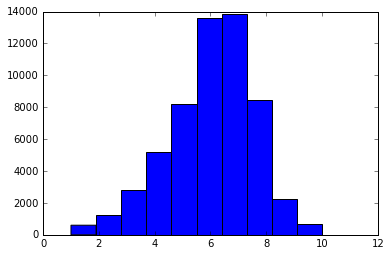

In [18]:
plt.hist(games['average_rating'])

In [20]:
games['average_rating'].mean()
games['average_rating'].std()

1.5788299348332662

In [104]:
training = games.columns.tolist()[3:10] + games.columns.tolist()[12:-1]
training

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [37]:
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
km = KMeans()
km.get_params().keys()

dict_keys(['verbose', 'copy_x', 'random_state', 'precompute_distances', 'init', 'n_init', 'tol', 'n_jobs', 'max_iter', 'n_clusters'])

In [46]:
#grid search for best cluster --> always return the largest number
param_range = [3,4,5,6,7]
param_grid = [{'n_clusters':[3,4,5,6,7,8,9,10]}]
gs = GridSearchCV(estimator = km,param_grid = param_grid,cv =10)
gs = gs.fit(games[training].values)
gs.best_params_

{'n_clusters': 10}

In [44]:
gs.best_params_

{'n_clusters': 7}

In [53]:
kmean = KMeans(n_clusters = 5)
kmean = kmean.fit(games[training])
games['labels'] = kmean.labels_
games['labels'].value_counts()

0    54699
2     1856
1      302
3       35
4        2
Name: labels, dtype: int64

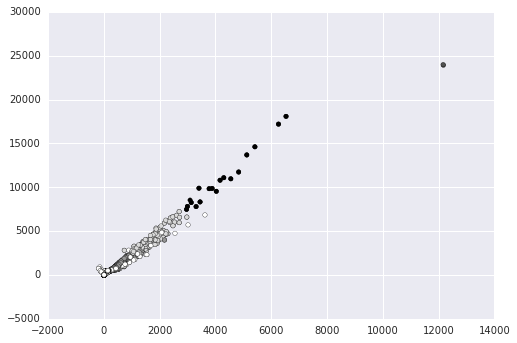

In [105]:
import numpy as np
games_mean = games[training].apply(np.mean, axis = 1)
games_std = games[training].apply(np.std, axis = 1)
plt.scatter(games_mean, games_std, c = labels)

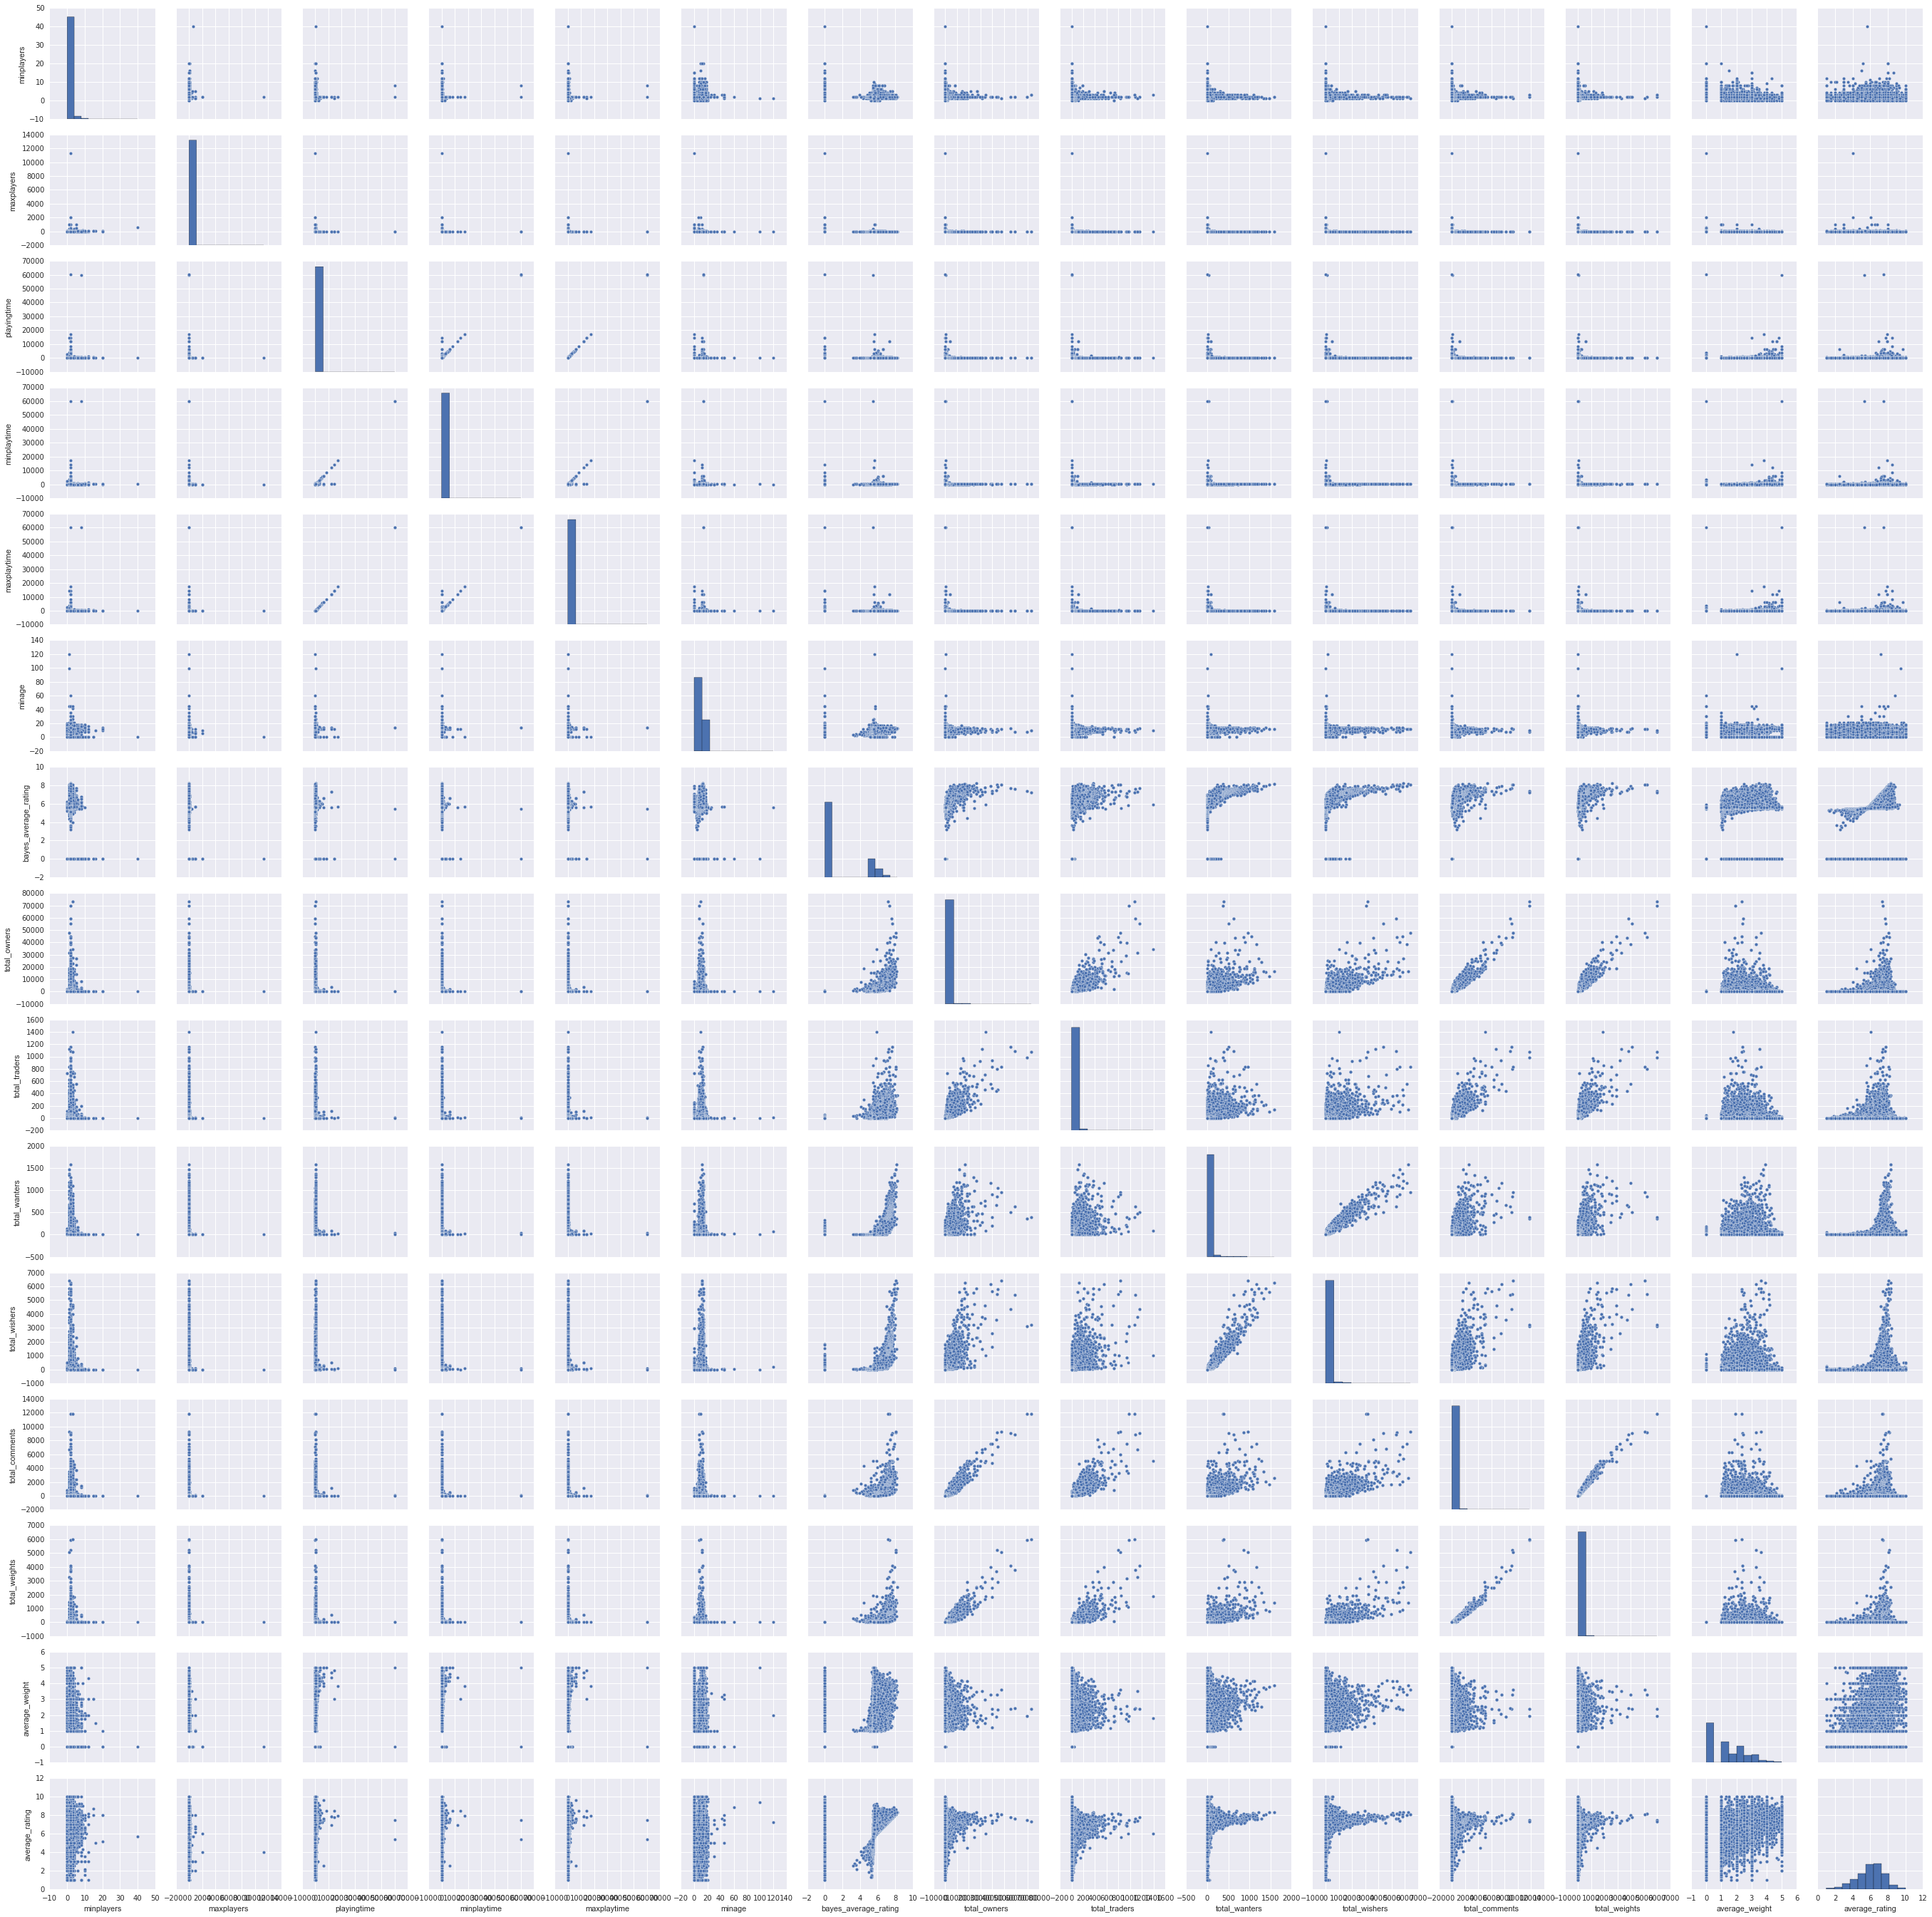

In [55]:
#explore correlations graphically
import seaborn as sns
col = training + ['average_rating']
sns.pairplot(games[col])
plt.show()

In [63]:
#explore correlation 
correlations = games[col].corr()
correlations['average_rating']


minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
average_rating          1.000000
Name: average_rating, dtype: float64

In [106]:
relevent = games[col].drop(['bayes_average_rating','average_rating'], axis = 1)
rel = games[col].drop(['average_rating'], axis = 1)

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sl = StandardScaler()
relevent_sl = sl.fit_transform(relevent.values)
lr = LinearRegression()
lr.fit(relevent_sl,games['average_rating'])
pred_rating = lr.predict(relevent_sl)
error = np.mean((pred_rating - games['average_rating'])**2)/len(pred_rating)
error
print (lr.score(relevent_sl,games['average_rating']),error)

0.155165084431 3.701420760304415e-05


In [109]:

lr = LinearRegression()
lr.fit(relevent,games['average_rating'])
pred_rating = lr.predict(relevent)
error = np.mean((pred_rating - games['average_rating'])**2)/len(pred_rating)
error
print (lr.score(relevent,games['average_rating']),error)

0.155165084431 3.701420760304417e-05


In [85]:
relevent.values

array([[  2.00000000e+00,   2.00000000e+00,   1.80000000e+02, ...,
          5.34700000e+03,   2.56200000e+03,   3.47850000e+00],
       [  2.00000000e+00,   5.00000000e+00,   1.50000000e+02, ...,
          2.52600000e+03,   1.42300000e+03,   3.89390000e+00],
       [  1.00000000e+00,   7.00000000e+00,   2.10000000e+02, ...,
          1.70000000e+03,   7.77000000e+02,   3.77610000e+00],
       ..., 
       [  2.00000000e+00,   6.00000000e+00,   0.00000000e+00, ...,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  2.00000000e+00,   2.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.00000000e+00,   4.00000000e+00,   6.00000000e+01, ...,
          0.00000000e+00,   2.00000000e+00,   1.50000000e+00]])

In [112]:
from sklearn.cross_validation import train_test_split
rel_train, rel_test, rating_train, rating_test = train_test_split(relevent_sl, games['average_rating'],test_size = 0.3, random_state = 1)
rating_pred = lr.fit(rel_train,rating_train).predict(rel_test)
pred_error = np.mean((rating_pred - rating_test)**2)/len(rating_pred)
pred_error

0.00012406460069305157

In [113]:
lr.score(rel_test,rating_test)

0.15509455109713388